In [1]:
import tars

ModuleNotFoundError: No module named 'tars'

In [1]:
from src import TARS, markets, portfolios, traders, strategies
import pandas as pd
%matplotlib inline

# Workbench

This is your place to try things and build new strategies. Be foolish!

## Instanciate Tars

In [2]:
api_key = f'../kraken.key'

In [3]:
portfolio_1 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_1 = traders.VirtualCryptoTrader(portfolio_1)
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)

portfolio_2 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_2 = traders.VirtualCryptoTrader(portfolio_2)
strategy_2 = strategies.SequentialInvestment(trader_2, 'XETHZUSD', 0.2, 6, "00:01:00")

In [4]:
# Create Tars and load its 
tars = TARS()
tars.load(strategy_1)
tars.load(strategy_2)

 🤖 TARS : Welcome to Endurance! 👨‍🚀
 🤖 TARS : Loaded strategy ➡️ Buy and hold
 🤖 TARS : Loaded strategy ➡️ Sequential Investment


## Run the bot

In [5]:
tars.start('00:00:10')

 🤖 TARS : Starting trading session 📈
 ⏱ Trading decision will be taken every : 00:00:10️ (hh:mm:ss)
 💪️ Loading :   
   🧵 'Thread-4' ➡️ 'Buy and hold'
   🧵 'Thread-5' ➡️ 'Sequential Investment'


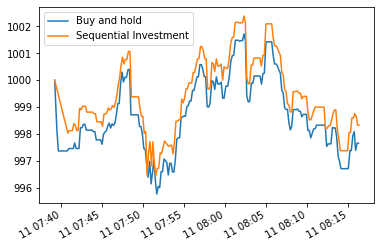

In [74]:
tars.plot()

In [16]:
tars.evaluate()

,Buy and hold,Sequential Investment
2021-08-11 07:39:00+00:00,1000.00,1000.00
2021-08-11 07:40:00+00:00,997.37,998.04
2021-08-11 07:41:00+00:00,997.46,998.13


In [20]:
!pwd

/Users/frederic.montet/src/project/tars/notebooks


In [69]:
def get_historical_data(pair, start=None, end=None):
    data_folder='../data/raw'
    df = pd.read_csv(f"{data_folder}/binance/Binance_{pair}_minute.csv", header=1) 
    df = df.infer_objects()
    df['dtime'] = pd.to_datetime(df['date'])
    df = df.set_index('dtime')
    df = df.rename(columns={
        'unix':'time',
        'tradecount':'count',
        'Volume ETH':'volume'
    })
    df = df.drop(columns=['symbol', 'date', 'Volume USDT'])
    
    if start is not None and end is not None:
        df = df[start:end]
    
    return df

df = get_historical_data('ETHUSDT')

In [78]:
import logging

def download_historical_data():
    logging.info("""To download historical data : \n 
        1. go on https://www.cryptodatadownload.com/data/binance/ \n
        2. download the Minutes files you want, \n
        3. put the file in the `data/raw/binance` folder.""")
    
download_historical_data()

 To download historical data : 
 
        1. go on https://www.cryptodatadownload.com/data/binance/ 

        2. download the Minutes files you want, 

        3. put the file in the `data/raw/binance` folder.


In [20]:
tars.stop()

---